In [58]:
import serial
import time
import re

In [59]:
# function for the clock
def current_time_millis():
    return int(round(time.time() * 1000))

# function to avoid messy serial data
def is_numeric_string(s):
    # regex to match a string that contains only digits
    pattern = r'^\d+$'
    
    if re.match(pattern, s):
        return True
    else:
        return False

In [70]:
arduino_port = "COM5"
baud_rate = 9600  

ser = serial.Serial(arduino_port, baud_rate, timeout=1)

time.sleep(1)

tap_data = []
time_data = []
start_time = current_time_millis()

try:
    while True:
        # Reading one line from serial
        if ser.in_waiting > 0:
            # getting the time data
            current_millis = current_time_millis()
            elapsed_time = current_millis - start_time

            # getting the tap data
            line = ser.readline().decode('utf-8').rstrip()

            # checking if the tap data is numeric using reg exp
            if is_numeric_string(line) is True:
                print(str(elapsed_time) + "," + str(line))

                # storing the data
                tap_data.append(line)
                time_data.append(elapsed_time)

            # adding delay to avoid overflow
            time.sleep(0.001)
            
except KeyboardInterrupt:
    print("Exiting Program")

finally:
    ser.close()


0,4360
574,353
577,360
585,360
589,355
597,360
601,360
606,360
614,360
617,354
625,356
630,360
634,360
642,360
646,360
661,357
664,360
667,360
671,360
677,360
683,360
687,360
695,360
699,353
704,355
712,360
719,360
724,360
729,360
733,358
741,360
744,360
753,357
757,360
763,360
769,360
775,360
782,354
786,355
793,360
797,360
803,360
810,360
814,353
822,360
826,420
832,420
839,420
843,420
851,420
857,420
863,420
867,413
873,417
880,420
884,413
892,416
896,419
904,420
908,415
913,418
921,420
925,413
933,418
937,420
945,413
950,417
955,420
962,420
966,417
974,419
978,420
982,415
991,416
996,420
1003,413
1008,413
1015,420
1019,420
1025,420
1031,420
1037,420
1044,420
1048,420
1056,420
1060,418
1064,419
1072,420
1076,413
1084,414
1089,419
1097,420
1101,417
1106,419
1113,420
1117,416
1125,419
1129,420
1138,413
1142,414
1146,420
1154,420
1160,413
1166,418
1171,420
1177,416
1183,420
1187,420
1196,415
1199,420
1207,420
1211,413
1217,415
1224,419
1228,420
1236,413
1241,419
1248,420
1252,1620
1261

3762


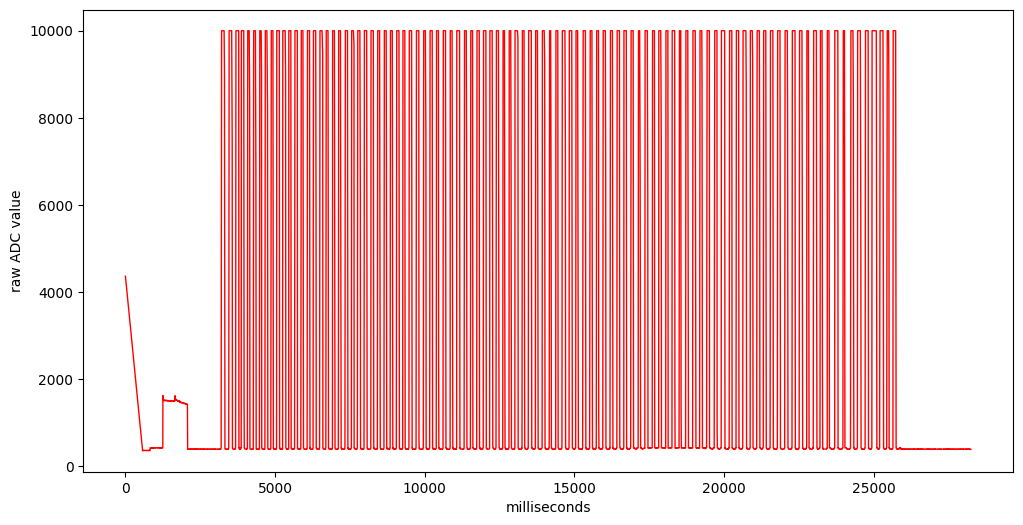

In [71]:
# converting tap data to int 
tap_data = [int(num) for num in tap_data]

print(len(tap_data)) 
# print(len(time_data)) 

from matplotlib import pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))  
plt.plot(time_data, tap_data, lw = 1.0, color = 'r')
plt.xlabel('milliseconds')
plt.ylabel('raw ADC value')
plt.show()

data = {'tap_data': tap_data, 'time_data': time_data}
df = pd.DataFrame(data)
# print(df)


In [72]:
df.to_csv('s30_index_l.csv', index=False)
